In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, mean_squared_error, get_scorer_names, classification_report

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
faces =  fetch_olivetti_faces()

# Convert data and target to a dataframe
faces_df = pd.DataFrame(faces.data)

# Add target variable to the dataframe
faces_df['SubjectID'] = faces.target

faces_df.head()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,SubjectID
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


## Problem Satement:

Build a predictive model for faces for the 40 distinct subjects in the AT&T Laboratories Cambridge data.

In [4]:
# Split data into X and y
y = faces_df['SubjectID'].copy()
X = faces_df.drop('SubjectID', axis=1).copy()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 42)


In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.402415,0.435873,0.478022,0.520868,0.558458,0.594202,0.626860,0.652131,0.667975,0.677299,...,0.361919,0.365315,0.360860,0.352247,0.331831,0.332658,0.335640,0.323631,0.315457,0.310563
std,0.181016,0.189294,0.194538,0.193381,0.185826,0.172860,0.160770,0.149373,0.143260,0.142931,...,0.163522,0.179647,0.179781,0.187285,0.180302,0.184645,0.193152,0.188717,0.181919,0.179779
min,0.086777,0.066116,0.090909,0.041322,0.111570,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.246901,0.267562,0.314050,0.383264,0.456612,0.516529,0.545455,0.582645,0.602273,0.611570,...,0.230372,0.217975,0.209711,0.197314,0.177686,0.177686,0.173554,0.173554,0.177686,0.173554
50%,0.400826,0.460744,0.512397,0.549587,0.586777,0.615702,0.657025,0.671488,0.683884,0.702479,...,0.367769,0.365702,0.347107,0.334711,0.309917,0.301653,0.301653,0.293388,0.278926,0.270661
75%,0.530992,0.574380,0.632231,0.669421,0.699380,0.714876,0.735537,0.757231,0.772727,0.777893,...,0.480372,0.495868,0.496901,0.488636,0.455579,0.455579,0.462810,0.446281,0.418388,0.417355
max,0.805785,0.822314,0.871901,0.855372,0.863636,0.863636,0.871901,0.867769,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.785124,0.921488,0.929752,0.884298,0.822314


## Exploratory Analysis

In [6]:
# Check and drop any duplicates
X_train = X_train.drop_duplicates()
X_train.count()

0       320
1       320
2       320
3       320
4       320
       ... 
4091    320
4092    320
4093    320
4094    320
4095    320
Length: 4096, dtype: int64

There are not any duplicates since the counts are all still 320.

In [7]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 139 to 60
Columns: 4096 entries, 0 to 4095
dtypes: float32(4096)
memory usage: 5.0 MB
None


In [8]:
# Check to see if all 40 participants are represented with count
print("Particpants:", y_train.value_counts().count())

Particpants: 40


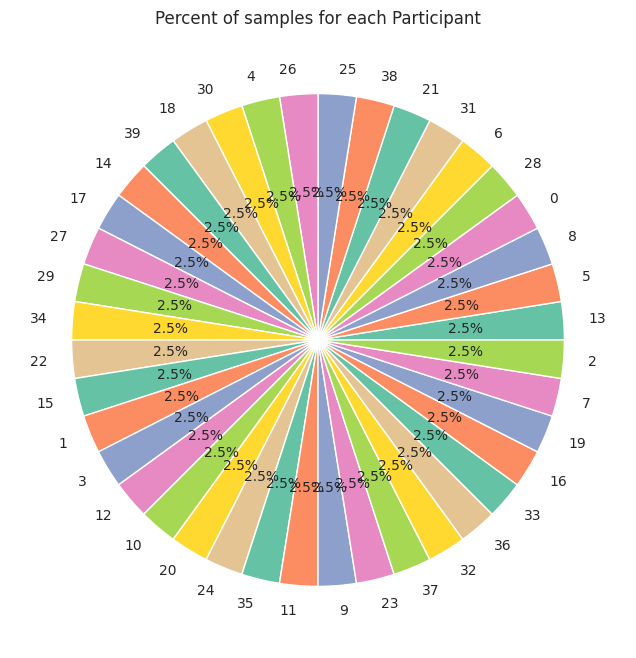

In [9]:
# Print a Pie chart to show the image dist of the 40 participants
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))
plt.figure(figsize = (8,8))
plt.pie(
    y_train.value_counts().values,
    colors = cmap,
    labels = y_train.value_counts().keys(),
    autopct='%.1f%%'
)
plt.title("Percent of samples for each Participant")
plt.show()

We used to have a data imbalance where not every person was being represented equally in the training set. However, I fixed this issue by stratifying over the 'y' or person. So now everyone is represented equally.

Also, something important to note is that we do have all 40 participants being represented in the training data.

Finally, I want to note that each of the features represents a pixel from a 64x64 image, hence why there are 4096 features.

In [10]:
# Check for any missing values
X_train.isnull().values.any()

False

There are no null values within the training dataset, meaning that we do not need to replace any null values using Imputation.

## Feature Engineering and Visualization

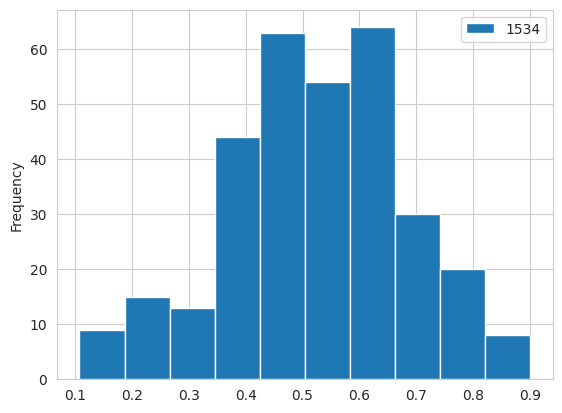

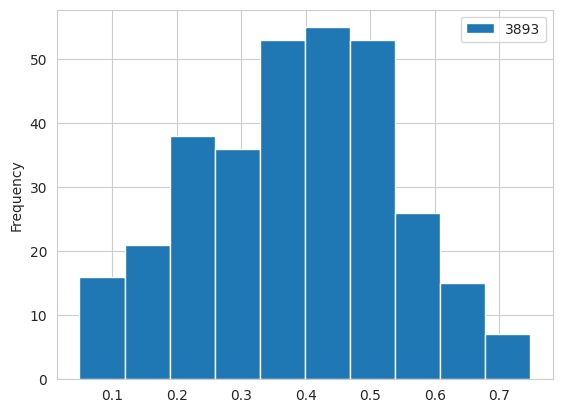

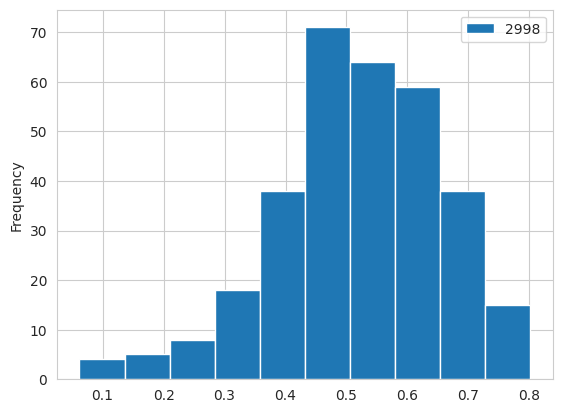

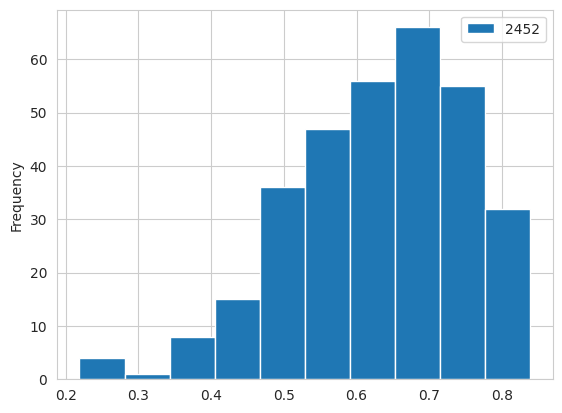

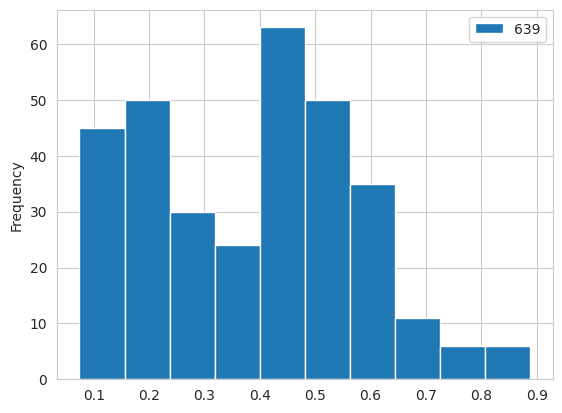

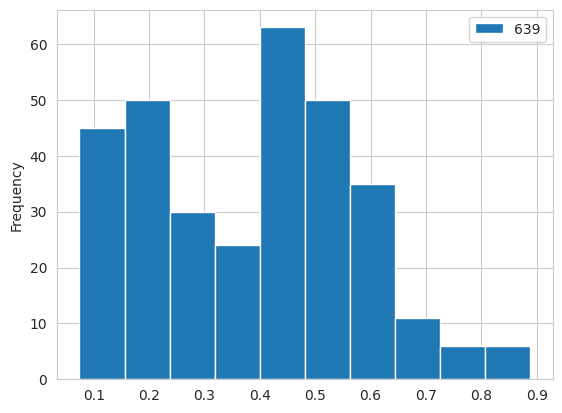

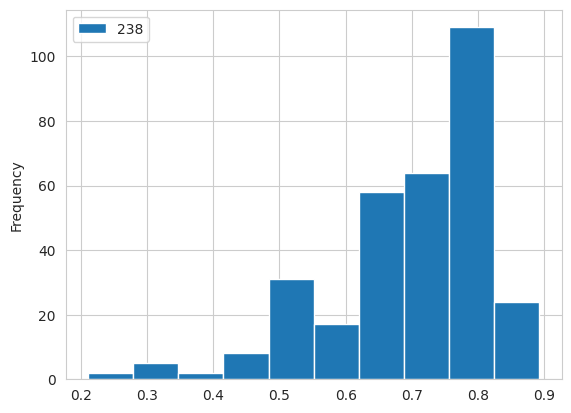

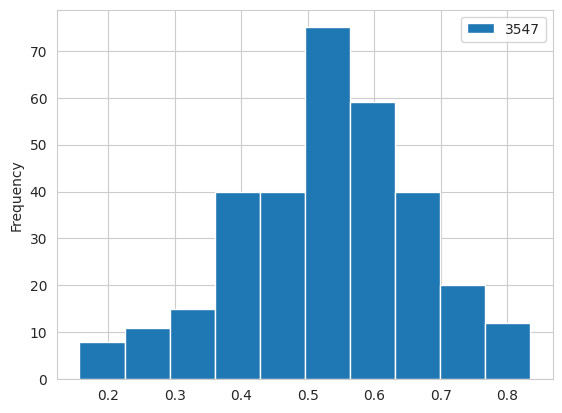

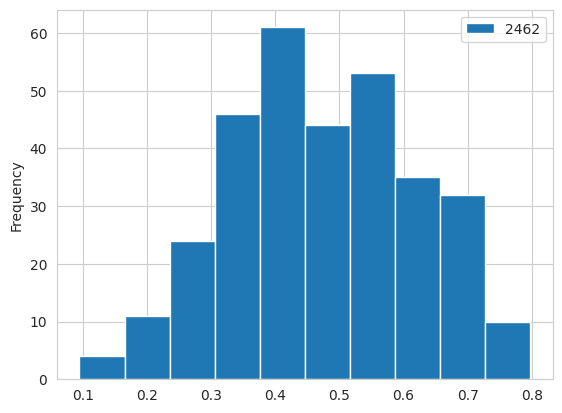

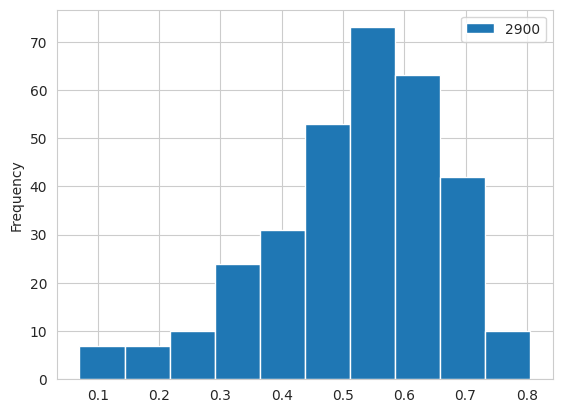

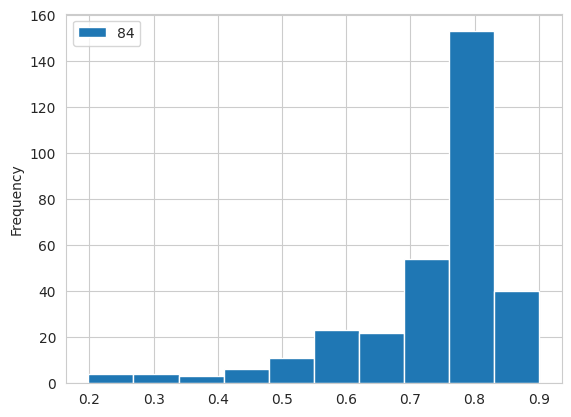

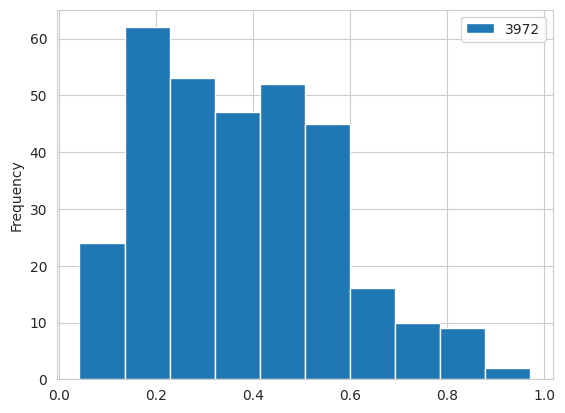

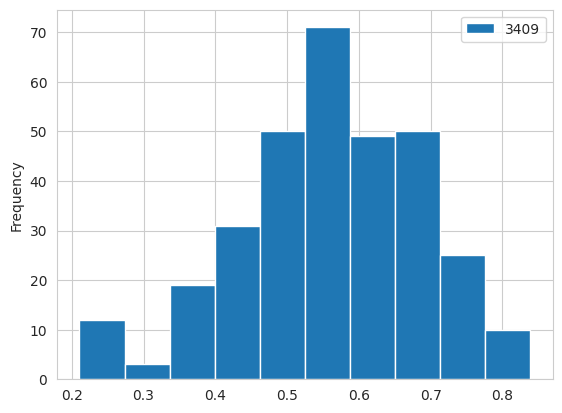

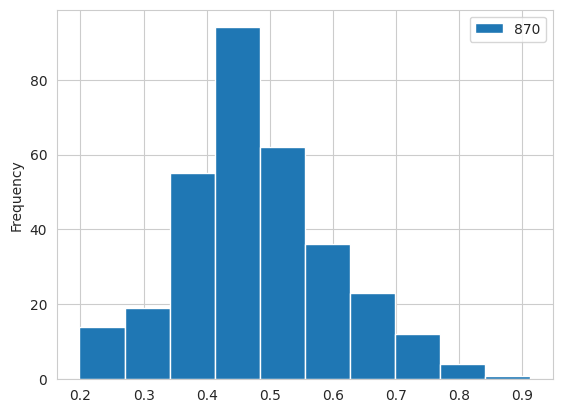

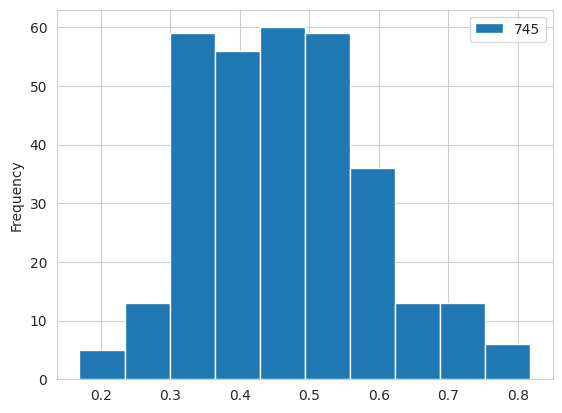

In [11]:
np.random.seed(42)

# Select 15 random pixels
pixels = np.rint(np.random.rand(15, 1)*4095)

# Plot the histogram of the 15 pixels (features)
for i in range(len(pixels)):
  X_train[pixels[i]].plot(kind= 'hist')

plt.show()

These histograms give us some strong insights into the distributions of the pixels across all of the photos along with the type of data the pixels are storing.

Firstly, we have some distributions that are skewed (left or right) and some that are approximately normal. Therefore, we should not do a sweeping target transformation on all of the data. However, pixel 82 is heavily skewed when compared to the others.

Secondly, we can see that all of the data is between 0 and 1. This means that we do not need to worry about Normalization as the data is already normalized. However, we are still going to standardize this data for better performance on PCA and SVM.

In [12]:
# Initizlize skewness types
positive = 0
negative = 0
normal = 0

# Check if each feature is skewed positively, negatively, or not skewed and add 1 to each type
for pixel in range(len(X_train.T)):
  skewness = skew(X_train[pixel])
  if skewness > 1:
    positive = positive + 1
  elif skewness < 1:
    negative = negative + 1
  else:
    normal = normal + 1

print(f"Positively Skewed: {positive}\nNegatively Skewed: {negative}\nApproximately Normal: {normal}")

Positively Skewed: 4
Negatively Skewed: 4092
Approximately Normal: 0


Following the historgrams showing some skewed data, I decided to check just which data is skewed at least moderately in either direction. I have found that a large amount of the data is actually at least moderately negatively skewed.

This could be an issue, however, we are planning on using a Decision Tree Regressor to classify the data. This means that the features do not need to be approximately normal.


In [13]:
# Standardize the training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality Reduction

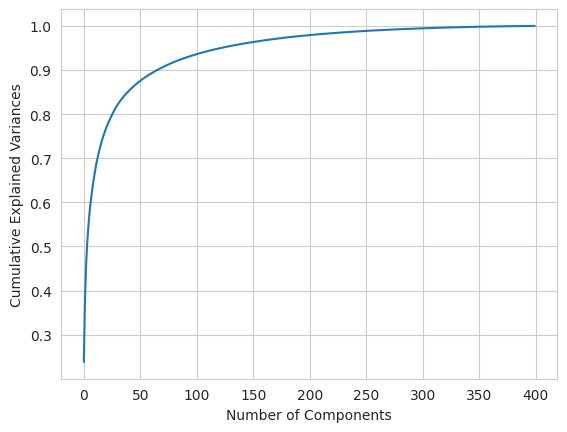

In [14]:
# Instantiate and initialize PCA on the full set
pca = PCA()
pca.fit(X)

# Get the cumulative sum of variances for every component
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variances
plt.plot(cumsum)
plt.ylabel('Cumulative Explained Variances')
plt.xlabel('Number of Components')
plt.show()

In [15]:
# Choose the min number of principal components to keep 90% variance
comps = np.argmax(cumsum >= .90) + 1

print("The optimal number of components to reduce to for 90% Variance is", comps)

The optimal number of components to reduce to for 90% Variance is 66


In [16]:
# Reinstanciate and initialize on training and test sets with our new amount of components to keep
pca = PCA(n_components = comps)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


print("Our new shape for the training set is now", X_train_pca.shape)

Our new shape for the training set is now (320, 66)


## Decision Trees

In [17]:
# Implement a DT Regression model
tree_clf = DecisionTreeRegressor()
tree_clf_pca = DecisionTreeRegressor()

tree_clf = tree_clf.fit(X_train, y_train) # W/o PCA
tree_clf_pca = tree_clf_pca.fit(X_train_pca, y_train) # With PCA

# Predict face test data
y_pred_dt = tree_clf.predict(X_test)
y_pred_dt_pca = tree_clf_pca.predict(X_test_pca)

# Round to the nearest integer to ensure data is falling between 0 and 39
y_pred_dt = y_pred_dt.round()
y_pred_dt_pca = y_pred_dt_pca.round()

# Caculate and print the MSE
mse = mean_squared_error(y_test, y_pred_dt)
mse_pca = mean_squared_error(y_test, y_pred_dt_pca)
print("The Mean Square Error is: (w/o PCA)", mse, "| With PCA:", mse_pca)

# Calculate and print the accuracy
tree_accuracy = accuracy_score(y_test, y_pred_dt)
tree_accuracy_pca = accuracy_score(y_test, y_pred_dt_pca)
print("Decision Tree Regressor Accuracy (w/o PCA):", tree_accuracy, "| With PCA:", tree_accuracy_pca)

The Mean Square Error is: (w/o PCA) 148.1875 | With PCA: 134.55
Decision Tree Regressor Accuracy (w/o PCA): 0.375 | With PCA: 0.2625


In [18]:
param_dist = {
    "max_depth":[2,100],
    "min_samples_leaf": np.random.randint(1, 10, 10),
    "min_weight_fraction_leaf": np.arange(.1, 1, .1),
    "max_features": ["auto", "log2", "sqrt", None],
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    "criterion": ['squared_error', 'poisson', 'friedman_mse', 'absolute_error']
}

# Randomly search for the best hyperparams for the DT regressor
dt_rand_search = RandomizedSearchCV(tree_clf, param_distributions=param_dist, n_iter=50)
dt_rand_search_pca = RandomizedSearchCV(tree_clf_pca, param_distributions = param_dist, n_iter=50)

dt_rand_search = dt_rand_search.fit(X_train, y_train)
dt_rand_search_pca = dt_rand_search_pca.fit(X_train_pca, y_train)


The Mean Square Error (w/o PCA) is: 110.125 | With PCA: 104.275
Decision Tree Regressor Accuracy (w/o PCA): 0.0625 | With PCA: 0.075


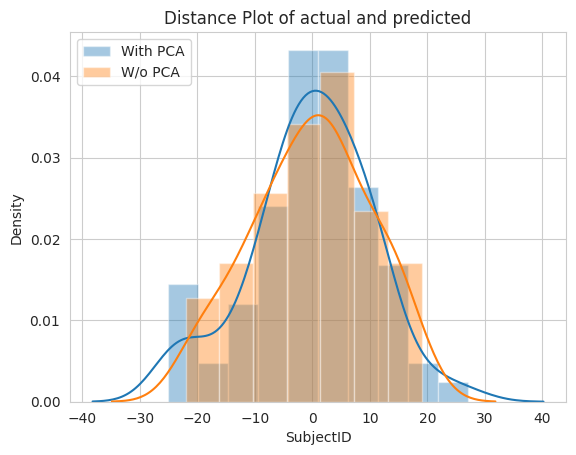

In [19]:
# Predict with the tuned Decision tree
y_pred_tuned_dt = dt_rand_search.predict(X_test)
y_pred_pca_tuned_dt = dt_rand_search_pca.predict(X_test_pca)

# Round to nearest label
y_pred_tuned_dt = y_pred_tuned_dt.round()
y_pred_pca_tuned_dt = y_pred_pca_tuned_dt.round()


# Plot distance between actual and predicted
sns.distplot(y_test-y_pred_tuned_dt, label = "With PCA")
sns.distplot(y_test-y_pred_pca_tuned_dt, label = "W/o PCA" )
plt.title(label = "Distance Plot of actual and predicted")
plt.legend(loc="upper left")

# Test Accuracies and new MSE's
mse = mean_squared_error(y_test, y_pred_tuned_dt)
mse_pca = mean_squared_error(y_test, y_pred_pca_tuned_dt)
print("The Mean Square Error (w/o PCA) is:", mse, "| With PCA:", mse_pca)

tree_accuracy = accuracy_score(y_test, y_pred_tuned_dt)
tree_accuracy_pca = accuracy_score(y_test, y_pred_pca_tuned_dt)
print("Decision Tree Regressor Accuracy (w/o PCA):", tree_accuracy, "| With PCA:", tree_accuracy_pca)


When we tried to hypertune the parameters, it ended up making our predictions worse off. My original thought was that the DT would work better than the others since it could just branch into the 40 different people, but that was not the case.

As for why the hyperparameter tuning didn't help the data very much, it could be that I am not tuning the right variables or it would work better as a DT Classifier. When I tried to tune as a DT Classifier, since the labels are numbers, the data just assumed it to be regression. Though, Ridge regression (and SVM) worked better than both!

## Random Forests

In [20]:
# Initialize and fit training (w and w/o PCA) data on Random Forest Regressor
forest = RandomForestClassifier(n_estimators = 40, random_state = 42, oob_score = True)
forest_pca = RandomForestClassifier(n_estimators = 40, random_state = 42, oob_score = True)

forest.fit(X_train, y_train)
forest_pca.fit(X_train_pca, y_train)

# Print OOB Scores
oob_score = forest.oob_score_
oob_score_pca = forest_pca.oob_score_
print("Out-Of-Bag Score for Random Forest (w/o PCA)", oob_score, "| With PCA:", oob_score_pca)

# Calculate predictions
y_pred_forest = forest.predict(X_test)
y_pred_forest_pca = forest_pca.predict(X_test_pca)

# Calculate and print Accuracies for PCA
print("Accuracy of Random Forest (w/o PCA):", accuracy_score(y_test, y_pred_forest), "| With PCA:", accuracy_score(y_test, y_pred_forest_pca))

Out-Of-Bag Score for Random Forest (w/o PCA) 0.81875 | With PCA: 0.75
Accuracy of Random Forest (w/o PCA): 0.9375 | With PCA: 0.925


The Random Forests appear to be a descent classification for the model. Not much accuracy nor oob score is lost with PCA, so if you can afford to do PCA, I don't see why you wouldn't.

Random Forests are definitely an improvement the Decision Trees. I imagine this is because of it's avoidance of overfitting.

## Gradient Descent and Regression

### Without PCA




In [21]:
# Initialize variables for gradient descent model
alpha = 0.001
n_iterations = 1000
m = X_train.shape[0] # Num of samples
n = X_train.shape[1] # Num of features

# Add bias term to feature matrix
X_train_bias = np.c_[np.ones((m,1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize the weights
theta_ridge =  np.random.randn(n+1, 40)
theta_lasso = np.random.randn(n+1, 40)

# Gradient Descent for Lasso and Ridge without PCA
for iteration in range(n_iterations):
  gradients_ridge = 1/(m) * X_train_bias.T @ (X_train_bias @ theta_ridge - np.eye(40)[y_train.values]) # Divided by 10,000 since values were becoming too large (becoming Nan)
  gradients_lasso = gradients_ridge + alpha *np.sign(theta_lasso)

  # Update theta's for ridge and lasso
  theta_ridge = theta_ridge - alpha * (gradients_ridge + alpha * theta_ridge)
  theta_lasso =  theta_lasso - alpha * gradients_lasso

In [22]:
# Intitialize different logistic regression models
lasso_reg = LogisticRegression(penalty='l1', solver='saga', C=0.01, max_iter=1000, multi_class='ovr')
ridge_reg = LogisticRegression(penalty='l2', C=0.01, max_iter=1000, multi_class='ovr')
reg = LogisticRegression(penalty ='none', max_iter=1000, multi_class ='ovr')

# Fit regression models
lasso_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
reg.fit(X_train, y_train)

# Test the Regressions with and without gradient descent
test_reg = reg.predict(X_test)
test_lasso_reg = lasso_reg.predict(X_test)
test_ridge_reg = ridge_reg.predict(X_test)

test_lasso_reg_gd = np.argmax(X_test_bias @ theta_lasso, axis=1)
test_ridge_reg_gd = np.argmax(X_test_bias @ theta_ridge, axis=1)


# Print accuracies
print("Logistic Regression Accuracy:", accuracy_score(y_test, test_reg))
print("Lasso Regression (no-GD) Accuracy", accuracy_score(y_test, test_lasso_reg))
print("Ridge regression (no-GD) Accuracy", accuracy_score(y_test, test_ridge_reg))
print("Lasso Regression with Gradient Descent Accuracy:", accuracy_score(y_test, test_lasso_reg_gd))
print("Ridge Regression with Gradient Descent Accuracy:", accuracy_score(y_test, test_ridge_reg_gd))


Logistic Regression Accuracy: 0.975
Lasso Regression (no-GD) Accuracy 0.025
Ridge regression (no-GD) Accuracy 0.975
Lasso Regression with Gradient Descent Accuracy: 0.0375
Ridge Regression with Gradient Descent Accuracy: 0.025


I originally used Lasso regression over ridge and logistic as I felt none of the features should be well distributed in terms of importance. However, I feel certain features will not be important since all of the pictures should have a similar background.

What happened, though, was that the  the gradient descent was making the model much worse in terms of accuracy. Therefore, I tested regular logistic regression, ridge, and lasso to see which does the best and if gradient descent was helping.

I found that gradient descent was hurting both lasso and ridge, but it hurt ridge less. This is probably because a lot of the features are actually more important than I initially thought.

Still, Ridge Regression with no gradient descent ended up being the best out of all of them.

### With PCA

In [23]:
# Initialize new vars for the gradient descent models
m = X_train_pca.shape[0] # Num of samples
n = X_train_pca.shape[1] # Num of features

# Add bias term to feature matrix
X_train_pca_bias = np.c_[np.ones((m,1)), X_train_pca]
X_test_pca_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test_pca]

# Initialize the weights
theta_ridge =  np.random.randn(n+1, 40)
theta_lasso = np.random.randn(n+1, 40)

# Gradient Descent for Lasso and Ridge with PCA
for iteration in range(n_iterations):
  gradients_ridge = 1/m * X_train_pca_bias.T @ (X_train_pca_bias @ theta_ridge - np.eye(40)[y_train.values])
  gradients_lasso = gradients_ridge + alpha *np.sign(theta_lasso)

  # Update theta's for ridge and lasso
  theta_ridge = theta_ridge - alpha * (gradients_ridge + alpha * theta_ridge)
  theta_lasso =  theta_lasso - alpha * gradients_lasso

In [24]:
# Fit regression models
lasso_reg.fit(X_train_pca, y_train)
ridge_reg.fit(X_train_pca, y_train)
reg.fit(X_train_pca, y_train)

# Test the Regressions with and without gradient descent
test_reg = reg.predict(X_test_pca)
test_lasso_reg = lasso_reg.predict(X_test_pca)
test_ridge_reg_pca = ridge_reg.predict(X_test_pca)

test_lasso_reg_gd = np.argmax(X_test_pca_bias @ theta_lasso, axis=1)
test_ridge_reg_gd = np.argmax(X_test_pca_bias @ theta_ridge, axis=1)


# Print accuracies
print("Logistic Regression Accuracy:", accuracy_score(y_test, test_reg))
print("Lasso Regression (no-GD) Accuracy", accuracy_score(y_test, test_lasso_reg))
print("Ridge regression (no-GD) Accuracy", accuracy_score(y_test, test_ridge_reg_pca))
print("Lasso Regression with Gradient Descent Accuracy:", accuracy_score(y_test, test_lasso_reg_gd))
print("Ridge Regression with Gradient Descent Accuracy:", accuracy_score(y_test, test_ridge_reg_gd))

Logistic Regression Accuracy: 0.8625
Lasso Regression (no-GD) Accuracy 0.05
Ridge regression (no-GD) Accuracy 0.975
Lasso Regression with Gradient Descent Accuracy: 0.0125
Ridge Regression with Gradient Descent Accuracy: 0.375


PCA with the regressions had an interesting effect. For one, it made Logistic Regression (the original) worse, and did not change Ridge regression with no Gradient Descent.

On the other hand, it improved Ridge Regression with gradient descent, but not by enough to really matter. So in the end, PCA was not necessary for these except for the fact that it has improved computation time while losing only a little accuracy.

Also, Ridge Regression (w/o GD) is better than Random Forests and is now our top pick algorithm, especially since it is just as good with and without PCA.

## Support Vector Machine (SVM)

In [25]:
# Train the LSVC and the RBF Kernel SVC with training set without PCA
clf_lin = svm.SVC(kernel='linear').fit(X_train, y_train) # C default is 1.0
clf_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train) # gamma = 'scale' is default - 1/(n_features*X.var())

# With PCA
clf_lin_pca = svm.SVC(kernel='linear').fit(X_train_pca, y_train) # C default is 1.0
clf_rbf_pca = svm.SVC(kernel='rbf').fit(X_train_pca, y_train) # gamma = 'scale' is default - 1/(n_features*X.var())


# Predict test data
y_pred_lin = clf_lin.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)

y_pred_pca_lin = clf_lin_pca.predict(X_test_pca)
y_pred_pca_rbf = clf_rbf_pca.predict(X_test_pca)

# Calculate accuracies of the SVM models
lin_accuracy = accuracy_score(y_test, y_pred_lin)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

lin_accuracy_pca = accuracy_score(y_test, y_pred_pca_lin)
rbf_accuracy_pca = accuracy_score(y_test, y_pred_pca_rbf)

# Print Accuracies
print("Accuracy of Linear SVC (w/o PCA):", lin_accuracy, "| With PCA:", lin_accuracy_pca)
print("Accuracy of RBF Kernel SVC (w/o PCA)", rbf_accuracy, "| With PCA:", rbf_accuracy_pca)

Accuracy of Linear SVC (w/o PCA): 0.975 | With PCA: 0.975
Accuracy of RBF Kernel SVC (w/o PCA) 0.95 | With PCA: 0.95


I chose to do Linear and RBF Kernels since Linear is the best for simpler data and RBF is the best for general data instead of being specialized for certain datasets.

It appears that they both are close and very accurate. Although Linear does look to work better for this dataset. In fact, it now has an equal accuracy with Ridge Regression (no-GD), so I would like to look at the other characteristics of performance.

In terms of PCA, it did not benefit, hurt or change the SVM model whatsoever. In fact, it ran fast doing both of them, so we may not need to even consider PCA if we did this model.

## Final Model Selection

In [26]:
# Print Classification Reports for Both SVM's
print("Classification scores for Linear SVM (w/ PCA)")
print(classification_report(y_test, y_pred_pca_lin))

print("Classification scores for Linear SVM (w/o PCA)")
print(classification_report(y_test, y_pred_lin))

Classification scores for Linear SVM (w/ PCA)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00  

In [27]:
# Print Classification Reports for Both Ridge Regression's (w and w/o PCA)
# Both without gradient Descent
print("Classification scores for Ridge Regression (no-GD) (w/ PCA)")
print(classification_report(y_test, test_ridge_reg))

print("Classification scores for Ridge Regression (no-GD) (w/o PCA)")
print(classification_report(y_test, test_ridge_reg_pca))

Classification scores for Ridge Regression (no-GD) (w/ PCA)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.

## Conclusions

In the end, I think we have a clear understanding of which two models performed the best, Linear SVM and Ridge Regression (no-GD). Even when looking into further details on precision, f1-score and recall, they are extremely similar. In the end, the only thing that somewhat changed things, was when we used PCA on Linear SVM where it swapped the precision score for person 39 and person 5.

For PCA's effectiveness on these models, I do not see a reason not to use it, as the models still appear to be well-described while losing nothing in terms of feature explaination. I feel like the features work well together, and mean little on their own. PCA does work well on linear data and models, and since these models are both linear, I am confident that PCA is good to continue.

As for PCA on other models, it can take away from accuracy, (especially on Logistic Regression). However, it makes up for it with it's ability to cut the features down from 4096 to 66 and keep 90% of the variance.

If I had to pick a model to predict the faces, I would go with Linear SVM as there may be a chance to improve the model with some more hyperparameter testing. Even if that failed, the model already works extremely accurately and is just as simple to implement as Ridge Regression on the Dataset.